<a href="https://colab.research.google.com/github/Jeeeeeeeee/Study/blob/main/Tabular_Playground_Series_Aug_2021_H2O_AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_path = '/content/drive/MyDrive/DATA/train.csv'
test_path = '/content/drive/MyDrive/DATA/test.csv'

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [4]:
train.head()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,...,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
0,0,-0.002350,59,0.766739,-1.350460,42.2727,16.68570,30.3599,1.267300,0.392007,1.09101,1.96874,1.874640,117.286,6.716200,0.985656,0.973428,4004232,0.377896,1.033820,0.574531,0.122371,8.18617,1517.830,3.13219,0.112836,5.01868,116.766,10891,8.19366,5.79715,1.09999,14.86840,-0.275434,0.915721,167.800,-7.534140,4.23632,1.629560,1.144400,...,70.9733,0.380057,0.031812,1.09527,0.563482,0.122689,1.160720,1.69391,1.07217,65.1543,0.022504,-5.6068,1.798660,0.528068,6696.300,-0.562078,1.301020,6.71624,1.143470,2.29983,0.010485,-0.127223,0.231086,4.51614,0.594494,397,0.264022,8.68790,15.070100,0.376622,-42.43990,26.854000,1.45751,0.696161,0.941764,1.828470,0.924090,2.29658,10.48980,15
1,1,0.784462,145,-0.463845,-0.530421,27324.9000,3.47545,160.4980,0.828007,3.735860,1.28138,-2.73947,-0.529506,157.670,0.696384,1.441230,0.159056,23567462,-0.089583,-0.711628,-1.045860,0.139920,3.69294,-123.354,7.74097,-0.852302,8.51025,161.175,87801,12.02020,1.78393,1.23100,10.14970,-0.018724,1.011280,127.401,11.821400,5.99681,-0.953850,1.379370,...,75.5602,1.987990,0.318177,1.14901,0.723574,0.184821,-0.348303,-7.17633,1.46258,43.1121,-0.060801,64.0455,2.358450,5.759690,3958.140,1.576610,-1.241790,5.91412,0.959826,2.56631,0.000652,-0.335617,-0.271723,5.10319,8.706220,98,0.210513,7.86416,3.371900,0.147973,-184.13200,7.901370,1.70644,-0.494699,-2.058300,0.819184,0.439152,2.36470,1.14383,3
2,2,0.317816,19,-0.432571,-0.382644,1383.2600,19.71290,31.1026,-0.515354,34.430800,1.24210,2.90180,-0.960340,118.590,7.696420,1.488760,0.387277,235760,0.055568,0.268560,0.718133,0.027133,11.67340,270.247,3.44051,-0.679071,13.37810,150.362,14173,1.69954,7.04728,1.10513,7.62871,0.685721,0.809485,120.064,194.427000,6.77866,0.634136,0.934386,...,99.4933,5.098040,0.258909,1.16878,0.049053,0.173547,0.937000,2.05947,1.22245,50.2267,-0.026215,71.6849,2.434170,1.904560,27165.800,-0.773223,-1.833390,4.98548,1.170870,1.17201,0.016848,-0.235581,-0.724935,3.22565,4.170990,105,-0.155451,8.91829,0.186334,0.335985,7.43721,37.218100,3.25339,0.337934,0.615037,2.216760,0.745268,1.69679,12.30550,6
3,3,0.210753,17,-0.616454,0.946362,-119.2530,4.08235,185.2570,1.383310,-47.521400,1.09130,-1.51200,-1.292340,125.461,7.343230,-3.092390,0.713795,1146032,0.326534,0.454842,0.219958,0.037982,5.15195,4893.860,6.89751,-0.830552,4.43184,132.855,77147,32.80900,4.06390,1.11911,3.91776,0.500353,0.206448,120.411,233.537000,7.75131,0.625762,-1.940810,...,60.8082,2.357590,0.239080,1.16116,0.535797,0.222185,1.163120,2.36343,1.41530,116.1820,0.018674,55.4428,2.228240,4.303600,2643.760,-1.666320,0.792398,6.45162,1.077330,2.90676,0.023735,-0.091992,-0.098701,4.27820,5.347530,512,0.855981,8.27663,4.066650,0.336490,9.66778,0.626942,1.49425,0.517513,-10.222100,2.627310,0.617270,1.45645,10.02880,2
4,4,0.439671,20,0.968126,-0.092546,74.3020,12.30650,72.1860,-0.233964,24.399100,1.10151,1.77348,-0.546781,147.186,17.394300,0.964678,0.964894,19272478,0.121071,0.422461,-0.103100,-0.000910,8.14191,162.713,1.56561,-0.300743,7.56458,160.995,5780,-1.54254,8.09081,1.60582,7.04632,-1.056850,1.727440,126.848,0.910761,6.08868,0.150619,1.134610,...,103.9900,4.396300,0.248451,1.18082,0.546460,0.140713,0.804404,7.55191,-2.50995,68.2459,0.001230,47.2885,0.461938,1.072440,703.401,0.691108,5.014080,6.06393,1.120250,1.73348,-0.001272,-0.333872,-0.063781,1.11420,5.233990,109,-0.158318,5.43062,0.991616,0.528518,290.65700,15.604300,1.73557,-0.476668,1.390190,2.195740,0.826987,1.78485,7.07197,1


In [7]:
train.isnull().sum().sum()
test.isnull().sum().sum()

0

# EDA Study

In [9]:
train.describe().T # 이거 가운데 어떻게 봅니까

,count,mean,std,min,25%,50%,75%,max
id,250000.0,124999.500000,72168.927986,0.000000,62499.750000,124999.500000,187499.250000,249999.00000
f0,250000.0,0.511213,0.307884,-0.069273,0.251287,0.514962,0.777323,1.07207
f1,250000.0,51.378476,42.396636,-17.000000,18.000000,41.000000,75.000000,273.00000
f2,250000.0,0.107155,1.322200,-7.895580,-0.611172,0.253815,0.759249,9.76859
f3,250000.0,0.050010,0.792368,-1.475560,-0.719418,0.004099,0.765456,1.68019
...,...,...,...,...,...,...,...,...
f96,250000.0,2.417556,0.892563,-1.131980,1.906718,2.340430,2.910020,5.57604
f97,250000.0,0.537484,0.226589,0.005249,0.359646,0.531347,0.709807,1.10540
f98,250000.0,1.576900,0.646306,-0.646967,1.215810,1.451285,1.901633,4.49262
f99,250000.0,8.048805,5.647368,-0.842397,3.732800,7.182205,10.998550,34.01920


In [16]:
# Function to calculate percentage

def plt_percentile(plot, feature):
  total = len(feature)
  for p in plot.patches:
    percentage = "{:.1f}%".format(100*p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x,y), size = 12, rotation = 45)

  plt.show()

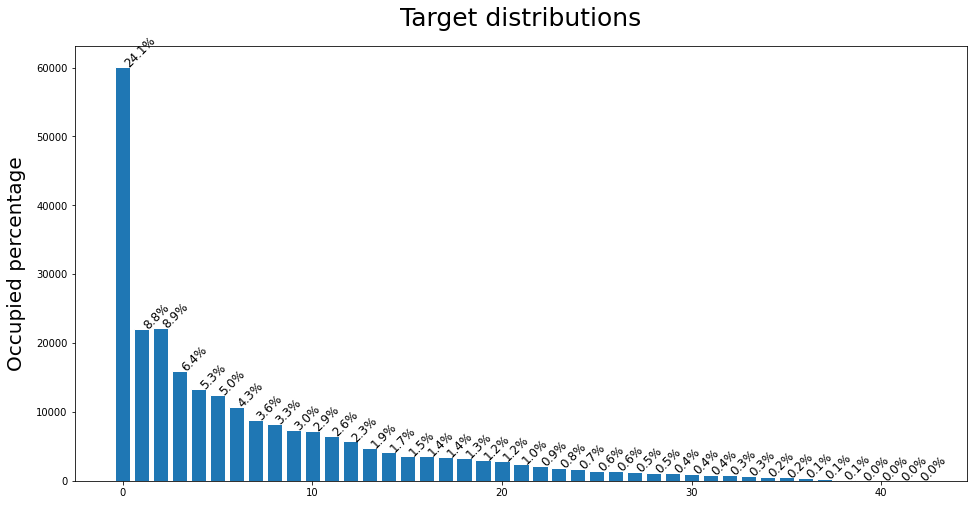

In [22]:
# the percentage of target variables

fig, ax = plt.subplots(figsize = (16, 8))

ax.bar(train['loss'].value_counts().sort_index().index,
       train['loss'].value_counts().sort_index().values,
       edgecolor = 'white')

ax.set_title("Target distributions", fontsize = 25, pad=20)
ax.set_ylabel("Occupied percentage", fontsize = 20, labelpad = 10)
plt_percentile(ax, train.loss)

In [14]:
train['loss'].value_counts().sort_index().index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42],
           dtype='int64')

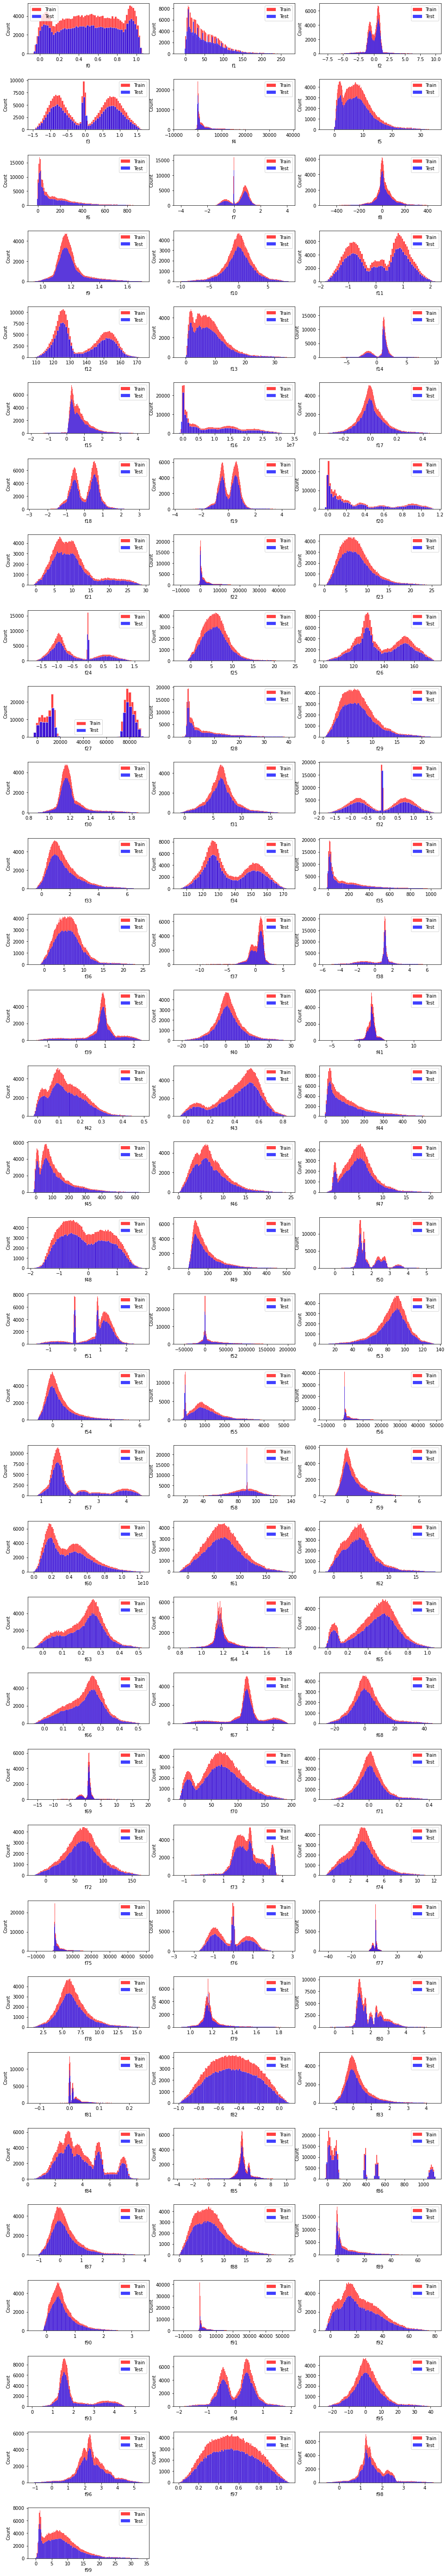

In [30]:
# Distributions of variables

columns = train.columns[1:-1]
plt.subplots(figsize = (16, 150))
length = len(columns)

for i, j in zip(columns, range(length)):
  fig = plt.subplot((length/2), 3, j+1)
  plt.subplots_adjust(wspace=.2, hspace=.5)
  sns.histplot(x = train[i], color = 'red', edgecolor = 'white')
  sns.histplot(x = test[i], color = 'blue', edgecolor = 'white')
  fig.legend(labels = ('Train', 'Test'))

### 궁금한거!
- skewed histogram 의 기준??
- fig = plt.subplot((length/2), 3, j+1) 세 칸 의미

# H2O AutoML

In [31]:
!pip install requests

In [32]:
!pip install tabulate
!pip install "colorama >= 0.3.8"
!pip install future

In [35]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     |████████████████████████████████| 164.8 MB 4.9 kB/s 
  Created wheel for h2o: filename=h2o-3.32.1.5-py2.py3-none-any.whl size=164886106 sha256=2f5de09bcc24edc9f7f5dc2bbe084c270a15d399e10037039755e81965d9f5d1
  Stored in directory: /root/.cache/pip/wheels/2f/f4/f6/7115a720596f0b6c377b3d82c28242585c7bb7ab27d430f97c
Successfully built h2o


In [36]:
import pandas as pd
import numpy as np
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp0wryp98r
  JVM stdout: /tmp/tmp0wryp98r/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp0wryp98r/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.5
H2O_cluster_version_age:,6 days
H2O_cluster_name:,H2O_from_python_unknownUser_6gspyf
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [37]:
train = train.drop('id', axis = 1)
test = test.drop('id', axis = 1)

train = h2o.H2OFrame(train)
test = h2o.H2OFrame(test) # change data into H2O Frame to use it

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [38]:
## train

x = train.columns
y = 'loss'
x.remove(y)

am1 = H2OAutoML(max_models=10, seed=1)
am1.train(x=x, y=y, training_frame = train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [42]:
b = am1.leaderboard

In [43]:
b.head(rows = b.nrows)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20210811_082136,61.7338,7.85709,61.7338,6.11193,1.21267
StackedEnsemble_BestOfFamily_AutoML_20210811_082136,61.8745,7.86603,61.8745,6.12226,1.21558
GBM_2_AutoML_20210811_082136,62.0768,7.87889,62.0768,6.13961,1.21991
GBM_1_AutoML_20210811_082136,62.1076,7.88084,62.1076,6.14149,1.22092
GBM_3_AutoML_20210811_082136,62.1222,7.88176,62.1222,6.14024,1.21955
XGBoost_3_AutoML_20210811_082136,62.2212,7.88804,62.2212,6.1384,1.21792
GBM_4_AutoML_20210811_082136,62.2697,7.89111,62.2697,6.14496,1.22002
GBM_5_AutoML_20210811_082136,62.2963,7.8928,62.2963,6.13921,1.21809
GLM_1_AutoML_20210811_082136,62.3718,7.89758,62.3718,6.15479,1.22392
DRF_1_AutoML_20210811_082136,62.6486,7.91509,62.6486,6.19062,1.22913


In [48]:
preds = am1.leader.predict(test)
sample_submission['loss'] = h2o.as_list(preds)['predict']
sample_submission.to_csv('submission.csv', index = False)

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [46]:
sample_submission_path = '/content/drive/MyDrive/DATA/sample_submission.csv'
sample_submission = pd.read_csv(sample_submission_path)

In [47]:
sample_submission

,id,loss
0,250000,0
1,250001,0
2,250002,0
3,250003,0
4,250004,0
...,...,...
149995,399995,0
149996,399996,0
149997,399997,0
149998,399998,0


- reference :  https://www.kaggle.com/jeongbinpark/tps-aug-h2o-automl-for-beginner